In [1]:
import pandas as pd 
diabetes_df = pd.read_csv('diabetes_clean.csv')

In [2]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = diabetes_df.drop('glucose', axis=1).values

In [4]:
y = diabetes_df['glucose'].values

In [5]:
X_bmi = X[:, 3]

In [6]:
X_bmi.shape

(768,)

In [8]:
X_bmi = X_bmi.reshape(-1, 1)

In [9]:
X_bmi.shape

(768, 1)

In [10]:
import matplotlib.pyplot as plt

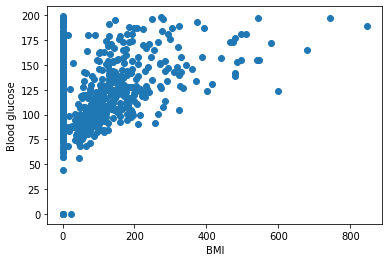

In [11]:
plt.scatter(X_bmi, y)
plt.ylabel('Blood glucose')
plt.xlabel('BMI')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
reg = LinearRegression()

In [14]:
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)

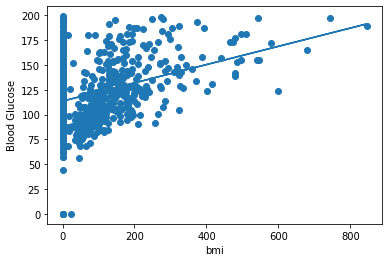

In [15]:
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel('Blood Glucose')
plt.xlabel('bmi')
plt.show()


## Exercises

In [16]:
sales_df = pd.read_csv('advertising_and_sales_clean.csv')

In [17]:
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [18]:
import numpy as np

# Create X from the radio column's values
X = sales_df['radio'].values

# Create y from the sales column's values
y = sales_df['sales'].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

(4546, 1) (4546,)


In [20]:
# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


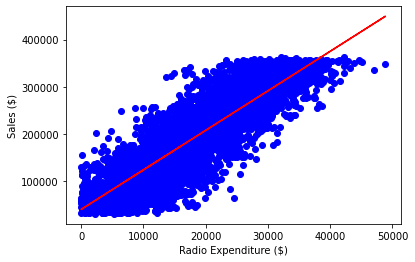

In [21]:
# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

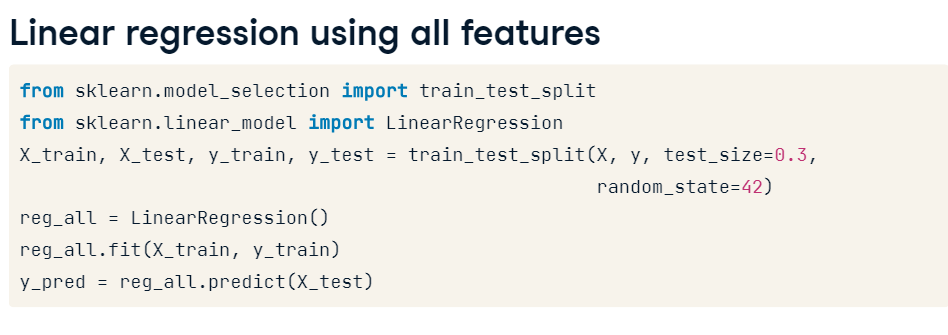

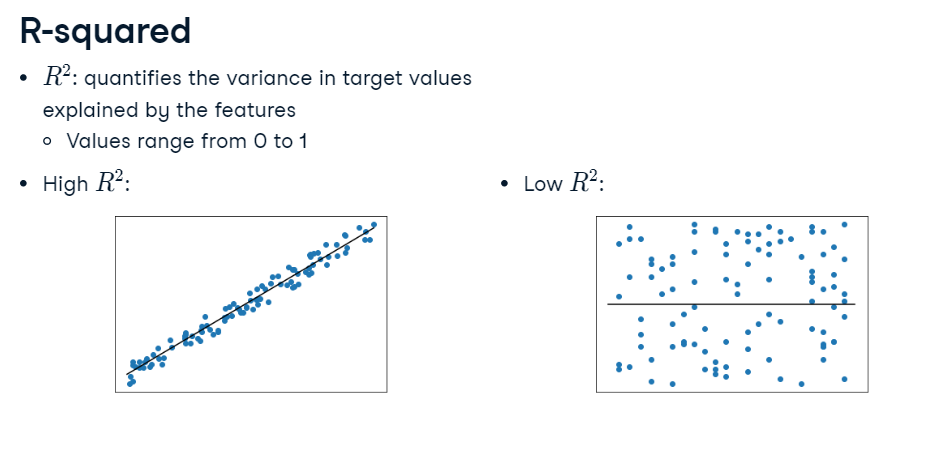
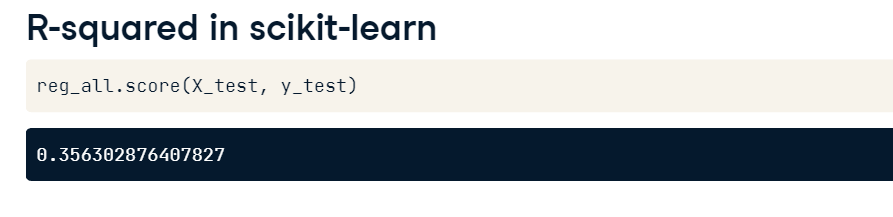

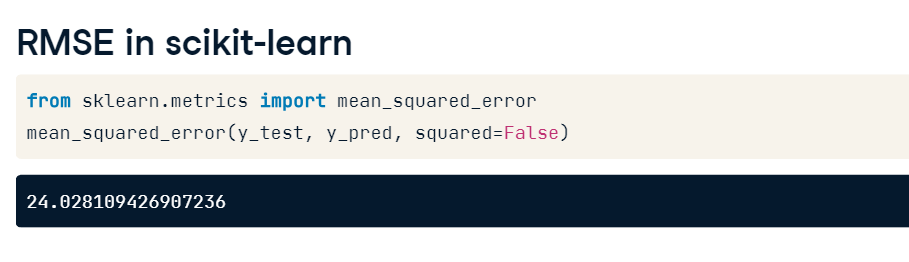


In [27]:
from sklearn.model_selection import train_test_split
# Create X and y arrays
# changing influencer column to be boolean
sales_df = pd.get_dummies(sales_df, columns=['influencer'], drop_first=True)
X = sales_df.drop("sales", axis=1).values 
y = sales_df["sales"].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53135.43066453 71060.6004603 ], Actual Values: [55261.28 67574.9 ]


In [28]:
sales_df

,tv,radio,social_media,sales,influencer_Mega,influencer_Micro,influencer_Nano
0,16000.0,6566.23,2907.98,54732.76,True,False,False
1,13000.0,9237.76,2409.57,46677.90,True,False,False
2,41000.0,15886.45,2913.41,150177.83,True,False,False
3,83000.0,30020.03,6922.30,298246.34,True,False,False
4,15000.0,8437.41,1406.00,56594.18,False,True,False
...,...,...,...,...,...,...,...
4541,26000.0,4472.36,717.09,94685.87,False,True,False
4542,71000.0,20610.69,6545.57,249101.92,False,False,True
4543,44000.0,19800.07,5096.19,163631.46,False,True,False
4544,71000.0,17534.64,1940.87,253610.41,False,False,False


In [29]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

R^2: 0.9990150033349248
RMSE: 2944.7428499310213


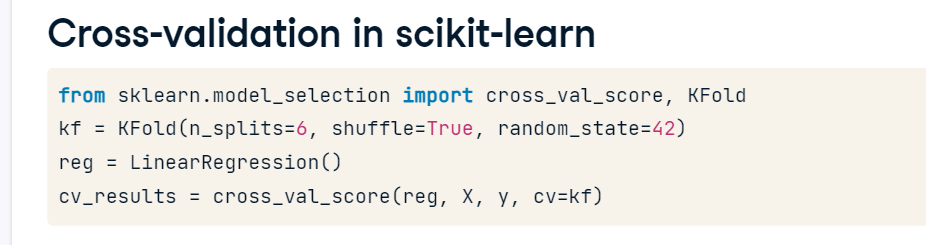

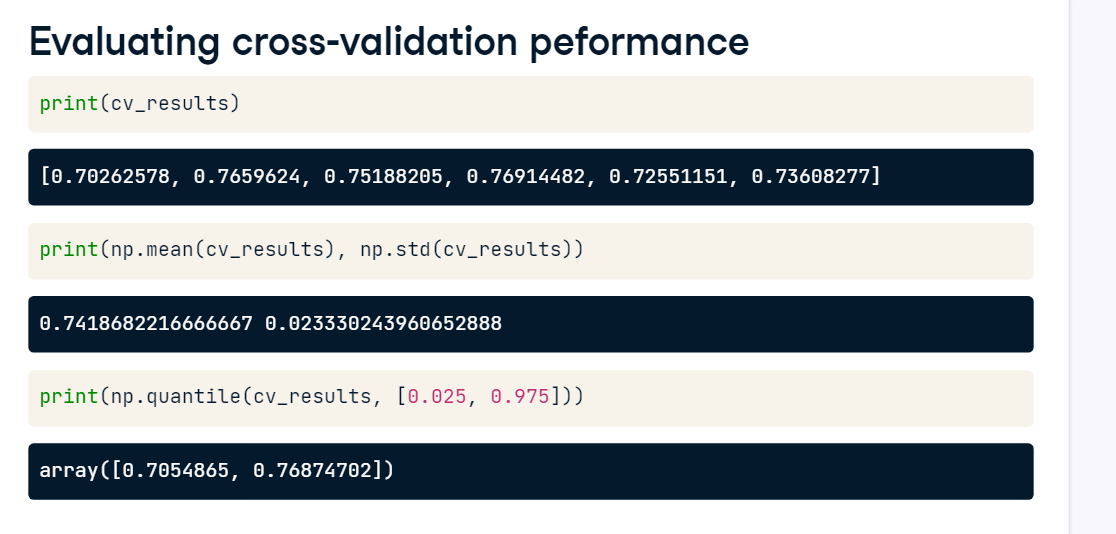

In [30]:
# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_scores)

[0.99893896 0.99909078 0.99900929 0.99896318 0.99889195 0.99903855]


In [32]:
# Print the mean
print(np.mean(cv_scores))

# Print the standard deviation
print(np.std(cv_scores))

# Print the 95% confidence interval
print(np.quantile(cv_scores, [0.025, 0.975]))

0.9989887858587477
6.559306063470636e-05
[0.99889783 0.99908425]


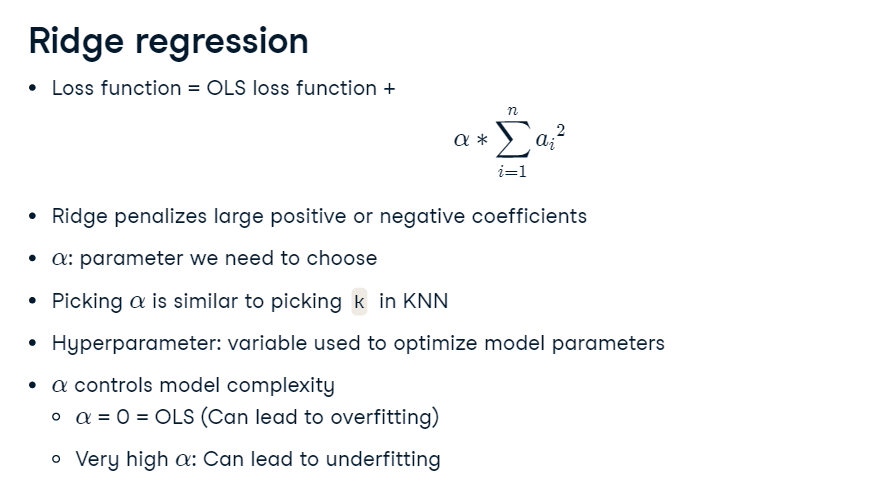


In [33]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:    
    ridge = Ridge(alpha=alpha)    
    ridge.fit(X_train, y_train)   
    y_pred = ridge.predict(X_test)    
    scores.append(ridge.score(X_test, y_test))
print(scores)


[0.9990150033784768, 0.9990150037697175, 0.9990150076129891, 0.9990150407484745, 0.9990151623295044]


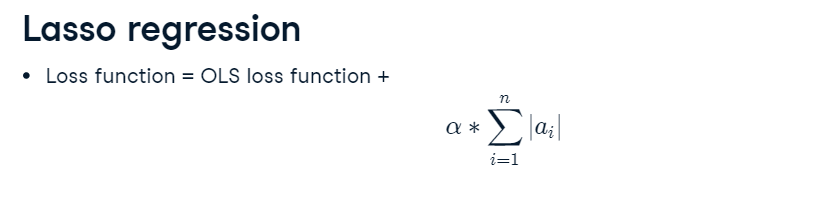

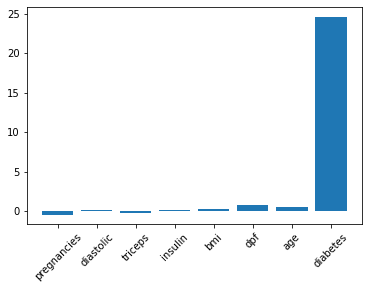

In [34]:
from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)

plt.xticks(rotation=45)
plt.show()


In [35]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

[0.9990150033784768, 0.9990150037697175, 0.9990150076129891, 0.9990150407484745, 0.9990151623295044, 0.999015208384041]
